In [79]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [80]:
data = pd.read_csv("heart.csv")

In [81]:
print("Shape: ", data.shape)

Shape:  (303, 14)


In [118]:
print("Feature names & data-types:",data.dtypes)

Feature names & data-types: age           int64
sex           int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
ca            int64
target        int64
cp_1           bool
cp_2           bool
cp_3           bool
thal_1         bool
thal_2         bool
thal_3         bool
slope_1        bool
slope_2        bool
dtype: object


In [83]:
print("Target:",data.target)

Target: 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [84]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1



The heart.csv has attributes (age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal)                                  
Target is to find if the patient has heart disease or not 

### missing values 

In [85]:

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

NO missing values present

### encoding catagorical data

In [86]:

cat = ["cp","thal","slope"]
data = pd.get_dummies(data,columns = cat, drop_first= True)


In [87]:
data.head(3)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,False,False,True,True,False,False,False,False
1,37,1,130,250,0,1,187,0,3.5,0,1,False,True,False,False,True,False,False,False
2,41,0,130,204,0,0,172,0,1.4,0,1,True,False,False,False,True,False,False,True


### Normalizing

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
x= data.drop('target',axis=1)
y=data['target']

In [90]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

### Splitting into train and test

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train , x_test , y_train, y_test = train_test_split(x_sc,y,test_size=0.2, random_state = 42 )

## Preprocessing
-checked for missing values  using .isnull()                                     
-applied one hot encoding   using get_dummies()                                      
-normalized the data  using StanderedScaler                                 
-splited the data into train and test                                              


# Training the model

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report , roc_curve,auc

In [94]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [95]:
pred = rf.predict(x_test)

In [96]:
acc = accuracy_score(y_test,pred)
print("accuracy score: " ,acc*100)

accuracy score:  85.24590163934425


Random forest model is trained with acc of 85.24 percentage

In [97]:
cm = confusion_matrix(y_test,pred)
cm

array([[25,  4],
       [ 5, 27]])

In [98]:
print("classification report:\n", classification_report(y_test,pred))

classification report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Text(50.722222222222214, 0.5, 'Actual')

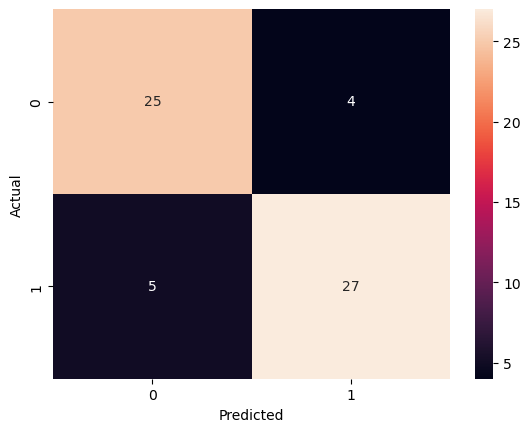

In [99]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [109]:
yroc = rf.predict_proba(x_test)[:,1]
falsepossitive_rate,truepossitive_rate,thresholds = roc_curve(y_test,yroc)
rauc = auc(falsepossitive,truepossitive)
rauc

np.float64(0.9256465517241379)

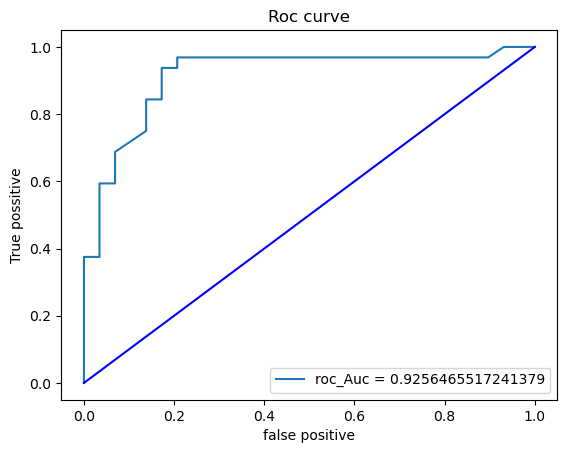

In [110]:
plt.plot(falsepossitive_rate,truepossitive_rate,label =f"roc_Auc = {rauc}")
plt.plot([0,1],[0,1] , color = "blue")
plt.title("Roc curve")
plt.xlabel("false positive")
plt.ylabel("True possitive")
plt.legend()

In [111]:
# hyperparameter tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
pgrid = { "n_estimators": [150,250] , "max_depth": [None,5,15] , "min_samples_split":[2,5]}
gridsc = GridSearchCV(estimator=rf,param_grid=pgrid,scoring="accuracy")

In [114]:
gridsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 15],
                         'min_samples_split': [2, 5],
                         'n_estimators': [150, 250]},
             scoring='accuracy')

In [115]:
gridsc.best_params_

{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 250}

In [116]:
gridsc.best_score_

np.float64(0.8098639455782312)

In [119]:
# tunned model
tunned_rf= gridsc.best_estimator_
new_pred = br.predict(x_test)
accuracy_score(y_test,new_pred) # tunned model accuracy

0.8524590163934426

GridSearchCv improved model perpromance by taking the best hyperparameters, the new tunned model has some heigher accuracy score than non-tunned model
Best parameters are : 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 250